In [54]:
# -*- coding: utf-8 -*-
"""
针对商品数据进行清洗，并简单分析
"""
#% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
bra = pd.read_csv(r'F:\MLwork\recommendation\origin_data\bra.csv')              #导入bra原始数据
bra.head()
#print(bra)
color_match = pd.read_csv(r'F:\MLwork\recommendation\origin_data\colors.csv')    #导入colors原始数据
color_match.head()
#print(color_match)
#用导入的colors数据以dict形式创建DataFrame,并给两列分别加入列名
colors = pd.DataFrame({'productColor':color_match.values[0:,1],'Color':color_match.values[0:,2]})
colors.head()
#print(colors)
data = pd.merge(bra,colors,how='left',on='productColor')            #将colors表中的Color列相应匹配合并进bra数据中，得到新数据data
data.head()
data

,creationTime,productColor,productSize,Color
0,2016-06-08 17:17:00,22咖啡色,75C,棕色
1,2017-04-07 19:34:25,22咖啡色,80B,棕色
2,2016-06-18 19:44:56,02粉色,80C,粉色
3,2017-08-03 20:39:18,22咖啡色,80B,棕色
4,2016-07-06 14:02:08,22咖啡色,75B,棕色
...,...,...,...,...
15492,2017-10-28 22:39:44,粉色,38B/85B,粉色
15493,2017-11-11 00:13:32,粉色套装（含内裤）,36C/80C,粉色
15494,2017-11-01 14:41:08,黑色,34A/75A,黑色
15495,2017-10-31 18:40:09,粉色,34B/75B,粉色


In [55]:
data['Size'] = data['productSize'].str.extract('([a-zA-Z])')
data.head()
#print(data)
bool = data['productColor'].str.contains(r'.*?内裤.*', na=False) & (~ data['productColor'].str.contains(r'.*?套装.*', na=False) )   #分离内衣（含套装）与内裤
briefs_data = data[bool]                                      #得到只含内裤的数据集
briefs_data.head()
briefs_data

,creationTime,productColor,productSize,Color,Size
1123,2017-09-15 20:11:54,内裤酒红色,170/82/XL,红色,X
1167,2017-09-14 19:35:27,内裤蓝灰色,170/82/XL,蓝色,X
1179,2017-08-15 21:55:38,内裤酒红色,160/70/M,红色,M
1185,2017-06-12 22:23:37,内裤蓝灰色,165/76/L,蓝色,L
1186,2017-08-11 21:03:59,内裤蓝灰色,170/82/XL,蓝色,X
...,...,...,...,...,...
8199,2017-11-14 16:24:17,内裤黑色,165/76/L,黑色,L
8203,2017-08-27 12:06:56,内裤肤色,165/76/L,肤色,L
8211,2017-10-14 22:19:23,内裤肤色,165/76/L,肤色,L
8213,2017-09-18 21:26:07,内裤肤色,160/70/M,肤色,M


In [56]:
bool2 = data['productColor'].isin(briefs_data['productColor'])
bras_data = data[~ bool2]                                     #得到内衣数据集
bool3 = bras_data['Size'].str.contains(r'.*?L|M|X|a|c.*', na=False)   
L = bras_data[bool3]
bool4 = bras_data['Size'].isin(L['Size'])
bras_data = bras_data[~ bool4]
bras_data

,creationTime,productColor,productSize,Color,Size
0,2016-06-08 17:17:00,22咖啡色,75C,棕色,C
1,2017-04-07 19:34:25,22咖啡色,80B,棕色,B
2,2016-06-18 19:44:56,02粉色,80C,粉色,C
3,2017-08-03 20:39:18,22咖啡色,80B,棕色,B
4,2016-07-06 14:02:08,22咖啡色,75B,棕色,B
...,...,...,...,...,...
15492,2017-10-28 22:39:44,粉色,38B/85B,粉色,B
15493,2017-11-11 00:13:32,粉色套装（含内裤）,36C/80C,粉色,C
15494,2017-11-01 14:41:08,黑色,34A/75A,黑色,A
15495,2017-10-31 18:40:09,粉色,34B/75B,粉色,B


In [4]:
print(briefs_data.describe())                                 #简单对两个数据集进行基本描述统计
print(bras_data.describe())

               creationTime productColor productSize Color Size
count                   313          313         313   313  313
unique                  310            4           3     4    3
top     2017-06-12 22:23:37        内裤蓝灰色    165/76/L    蓝色    L
freq                      2          144         137   144  137
               creationTime productColor productSize  Color   Size
count                 15091        15090       15090  15090  15090
unique                14599          112         114     10      5
top     2016-12-17 15:16:37           肤色     80B/36B     蓝色      B
freq                      2         1513        2580   3270  12399


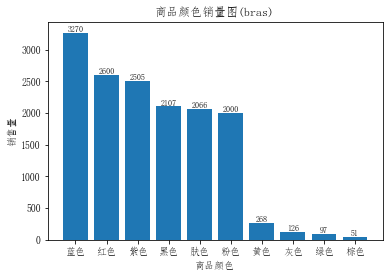

蓝色为内衣热卖颜色


In [5]:
#绘制内衣颜色统计图（柱状图）
bras_color_count = bras_data.groupby('Color').count()         #统计bras_data集中颜色分类结果
bdata_1 = bras_color_count['productColor']
bdata_1 = bdata_1.sort_values(ascending=False)
labels = bdata_1.index
x = range(len(bdata_1.index))                                 # x轴分组个数
plt.bar(x,height=bdata_1.values,width=0.8,tick_label=labels)
mpl.rcParams['font.sans-serif'] = ['FangSong']                # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False                    # 解决保存图像是负号'-'显示为方块的问题
plt.xlabel(u"商品颜色")                                        # 指定x轴描述信息
plt.ylabel(u"销售量")                                          # 指定y轴描述信息
plt.title("商品颜色销量图(bras)")                          # 指定图表描述信息
for a,b in zip(x,bdata_1.values):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8)
plt.show()
print('蓝色为内衣热卖颜色')

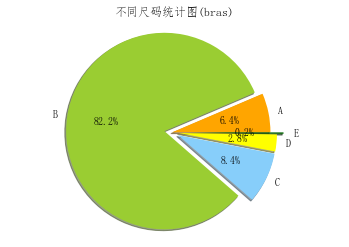

内衣尺码应主要购进B


In [6]:
#绘制内衣尺码统计图（饼图）
bra_size_count = bras_data.groupby('Size').count()
bra_s = bra_size_count['productSize']
#print(bra_s)
fig,ax1 = plt.subplots()
explode = (0,0.12,0.1,0.1,0.2)                                       #将某一块分割出来
colors = ['orange','yellowgreen','lightskyblue','yellow', 'darkgreen']
ax1.pie(bra_s.values,labels=bra_s.index,explode=explode,autopct='%.1f%%',radius=1.5,colors=colors,shadow=True,startangle=0)
ax1.axis('equal')
plt.title('不同尺码统计图(bras)')
plt.show()
print('内衣尺码应主要购进B')

In [50]:
bras_data2 = bras_data.iloc[:,3:]
bras_data2 = bras_data2.reindex(columns = ['Size','Color','counts'],fill_value = 1)
bras_class1 = bras_data2.groupby(['Size','Color'],as_index = False)['counts'].count()
bras_class2 = bras_class1.sort_values('counts',ascending=False)
print('B尺码内衣蓝色、紫色、红色的销量均在2000以上，其中蓝色最高')
bras_class2

B尺码内衣蓝色、紫色、红色的销量均在2000以上，其中蓝色最高


,Size,Color,counts
16,B,蓝色,2818
12,B,紫色,2358
13,B,红色,2355
11,B,粉色,1739
18,B,黑色,1696
15,B,肤色,1211
31,D,肤色,373
25,C,蓝色,319
27,C,黑色,249
5,A,肤色,243


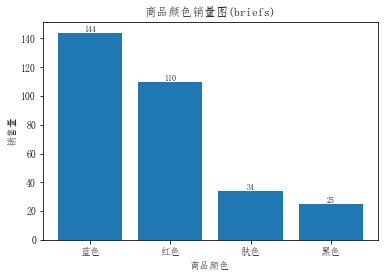

内裤最热卖的颜色是蓝色


In [7]:
#绘制内裤颜色统计图（柱状图）
briefs_color_count = briefs_data.groupby('Color').count()         #统计bras_data集中颜色分类结果
bdata_1 = briefs_color_count['productColor']
bdata_1 = bdata_1.sort_values(ascending=False)
labels = bdata_1.index
x = range(len(bdata_1.index))                                 # x轴分组个数
plt.bar(x,height=bdata_1.values,width=0.8,tick_label=labels)
mpl.rcParams['font.sans-serif'] = ['FangSong']                # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False                    # 解决保存图像是负号'-'显示为方块的问题
plt.xlabel(u"商品颜色")                                        # 指定x轴描述信息
plt.ylabel(u"销售量")                                          # 指定y轴描述信息
plt.title("商品颜色销量图(briefs)")                                     # 指定图表描述信息
for a,b in zip(x,bdata_1.values):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8)
plt.show()
print('内裤最热卖的颜色是蓝色')

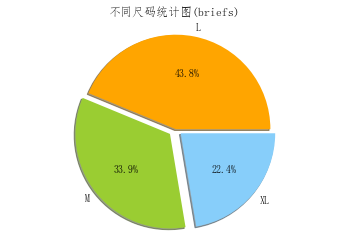

内裤尺码应主要购进M、L


In [8]:
#绘制内裤尺码统计图（饼图）
brief_size_count = briefs_data.groupby('Size').count()
brief_s = brief_size_count['productSize']
#print(brief_s)
fig,ax2 = plt.subplots()
explode = (0,0.12,0.1)                                       
colors = ['orange','yellowgreen','lightskyblue']
ax2.pie(brief_s.values,labels=['L','M','XL'],explode=explode,autopct='%.1f%%',radius=1.5,colors=colors,shadow=True,startangle=0)
ax2.axis('equal')
plt.title('不同尺码统计图(briefs)')
plt.show()
print('内裤尺码应主要购进M、L')

In [52]:
briefs_data2 = briefs_data.iloc[:,3:]
briefs_data2 = briefs_data2.reindex(columns = ['Size','Color','counts'],fill_value = 1)
briefs_class1 = briefs_data2.groupby(['Size','Color'],as_index = False)['counts'].count()
briefs_class2 = briefs_class1.sort_values('counts',ascending=False)
print('L尺码内裤蓝色销量最高')
briefs_class2

L尺码内裤蓝色销量最高


,Size,Color,counts
2,L,蓝色,63
6,M,蓝色,52
0,L,红色,43
4,M,红色,40
10,X,蓝色,29
8,X,红色,27
1,L,肤色,20
3,L,黑色,11
5,M,肤色,10
11,X,黑色,10
